In [4]:
# Importing all required libraries
# Linear Algebra
import numpy as np

# Data Processing
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Algorithm 

from sklearn.svm import SVC, LinearSVC

### 1. Import the dataset

In [5]:
# Loading the csv dataset from pandas api
df = pd.read_csv('kidney_disease.csv')
# displaying the top 5 records to check the data
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# checking descriptional statistical values
df.describe(include='all')

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# displaying the metadata information of data dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
pd.set_option('display.max_columns',30)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


Missing data

<AxesSubplot:>

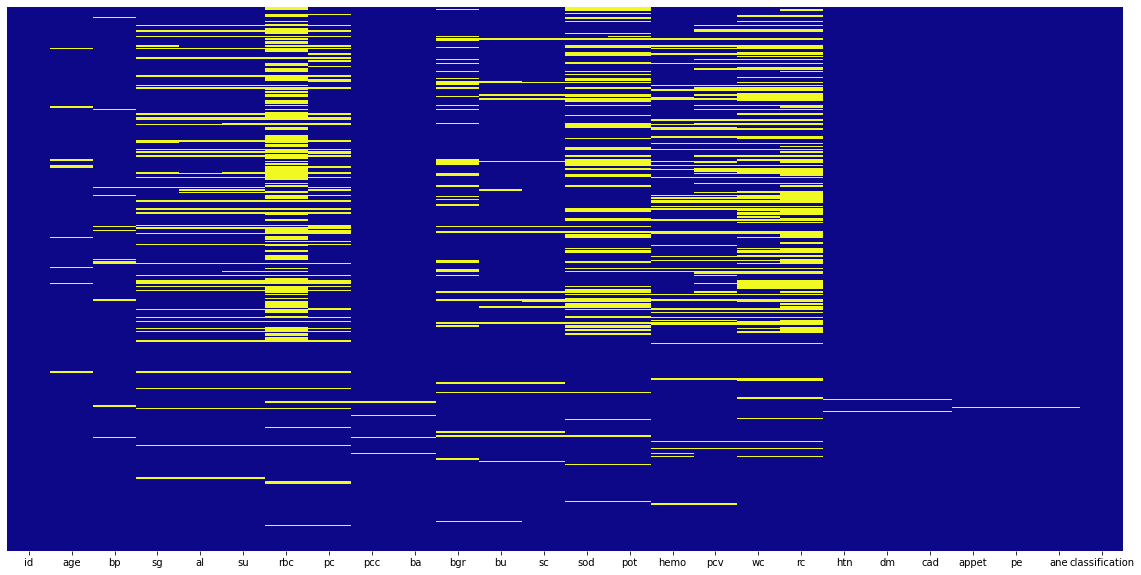

In [10]:
# Visualization of Missing variables
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [11]:
print("Count of null values") 
df.isnull().sum()

Count of null values


id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [13]:
# Extracting null cols
null_cols = df.columns[df.isnull().any()]

In [15]:
for cols in df.select_dtypes("object"):
    df[cols] = df[cols].astype("category")
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              400 non-null    int64   
 1   age             391 non-null    float64 
 2   bp              388 non-null    float64 
 3   sg              353 non-null    float64 
 4   al              354 non-null    float64 
 5   su              351 non-null    float64 
 6   rbc             248 non-null    category
 7   pc              335 non-null    category
 8   pcc             396 non-null    category
 9   ba              396 non-null    category
 10  bgr             356 non-null    float64 
 11  bu              381 non-null    float64 
 12  sc              383 non-null    float64 
 13  sod             313 non-null    float64 
 14  pot             312 non-null    float64 
 15  hemo            348 non-null    float64 
 16  pcv             330 non-null    category
 17  wc              

In [16]:
cat_cols = []
for cols in df.select_dtypes("category"):
    cat_cols.append(cols)
value_count_lst = []
for col in df.select_dtypes("category"):
    value_count_lst.append(df[col].value_counts())    

In [17]:
value_count_lst

[normal      201
 abnormal     47
 Name: rbc, dtype: int64,
 normal      259
 abnormal     76
 Name: pc, dtype: int64,
 notpresent    354
 present        42
 Name: pcc, dtype: int64,
 notpresent    374
 present        22
 Name: ba, dtype: int64,
 52      21
 41      21
 44      19
 48      19
 40      16
 43      14
 45      13
 42      13
 28      12
 50      12
 36      12
 33      12
 32      12
 37      11
 34      11
 29       9
 46       9
 30       9
 35       9
 31       8
 24       7
 39       7
 26       6
 38       5
 51       4
 54       4
 47       4
 53       4
 49       4
 27       3
 22       3
 25       3
 19       2
 23       2
 \t43     1
 \t?      1
 21       1
 20       1
 18       1
 17       1
 16       1
 15       1
 14       1
 9        1
 Name: pcv, dtype: int64,
 9800      11
 6700      10
 9200       9
 9600       9
 7200       9
           ..
 4100       1
 4900       1
 \t8400     1
 5100       1
 9900       1
 Name: wc, Length: 92, dtype: int64,
 5.2    1

In [18]:
de_cols = ['classification','pcv','wc','rc','dm','cad']

for cols in df[de_cols]:
    df[cols] = df[cols].str.replace('\t',"")
    df[cols] = df[cols].replace("?",np.nan)
    df[cols] = df[cols].str.strip()

In [20]:
# Let us cross-check it with target feature "classification"
df.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [21]:
cat_num_cols = ["pcv","wc","rc"]
for col in df[cat_num_cols]:
    df[col] = df[col].astype("float")

In [22]:
cat_obj_cols = ["dm","cad","classification"]
for col in df[cat_obj_cols]:
    df[col] = df[col].astype("category")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              400 non-null    int64   
 1   age             391 non-null    float64 
 2   bp              388 non-null    float64 
 3   sg              353 non-null    float64 
 4   al              354 non-null    float64 
 5   su              351 non-null    float64 
 6   rbc             248 non-null    category
 7   pc              335 non-null    category
 8   pcc             396 non-null    category
 9   ba              396 non-null    category
 10  bgr             356 non-null    float64 
 11  bu              381 non-null    float64 
 12  sc              383 non-null    float64 
 13  sod             313 non-null    float64 
 14  pot             312 non-null    float64 
 15  hemo            348 non-null    float64 
 16  pcv             329 non-null    float64 
 17  wc              

In [24]:
# Copying the dataframe "kidney_data" to dataframe "knn_df"
knn_df = df.copy()

# Categorical Columns
cat_cols = []
for col in knn_df.select_dtypes("category"):
    cat_cols.append(col)
    
kd_cat_df = pd.DataFrame(knn_df[cat_cols])

# Numerical Columns
num_cols = []
for col in knn_df.select_dtypes(['int64','float64']):
    num_cols.append(col)

kd_num_df = pd.DataFrame(knn_df[num_cols])    

In [25]:
#For imputing numerical columns we will be using Random Imputation
def random_imputation(df, feature):
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature] = np.random.choice(observed_values, number_missing, replace = True)
    return df

In [26]:
for feature in num_cols:
    kd_num_df = pd.DataFrame(random_imputation(kd_num_df, feature))
# Imputing the categorical cols using mode
kd_cat_df[cat_cols] = kd_cat_df[cat_cols].fillna(kd_cat_df.mode().iloc[0])

kd_cat_df.head()    

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [27]:
# After imputation, copying the numerical and categorical columns to dataframe "kidney_data"

df[num_cols] = kd_num_df
df[cat_cols] = kd_cat_df

df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

### Outliers analysis

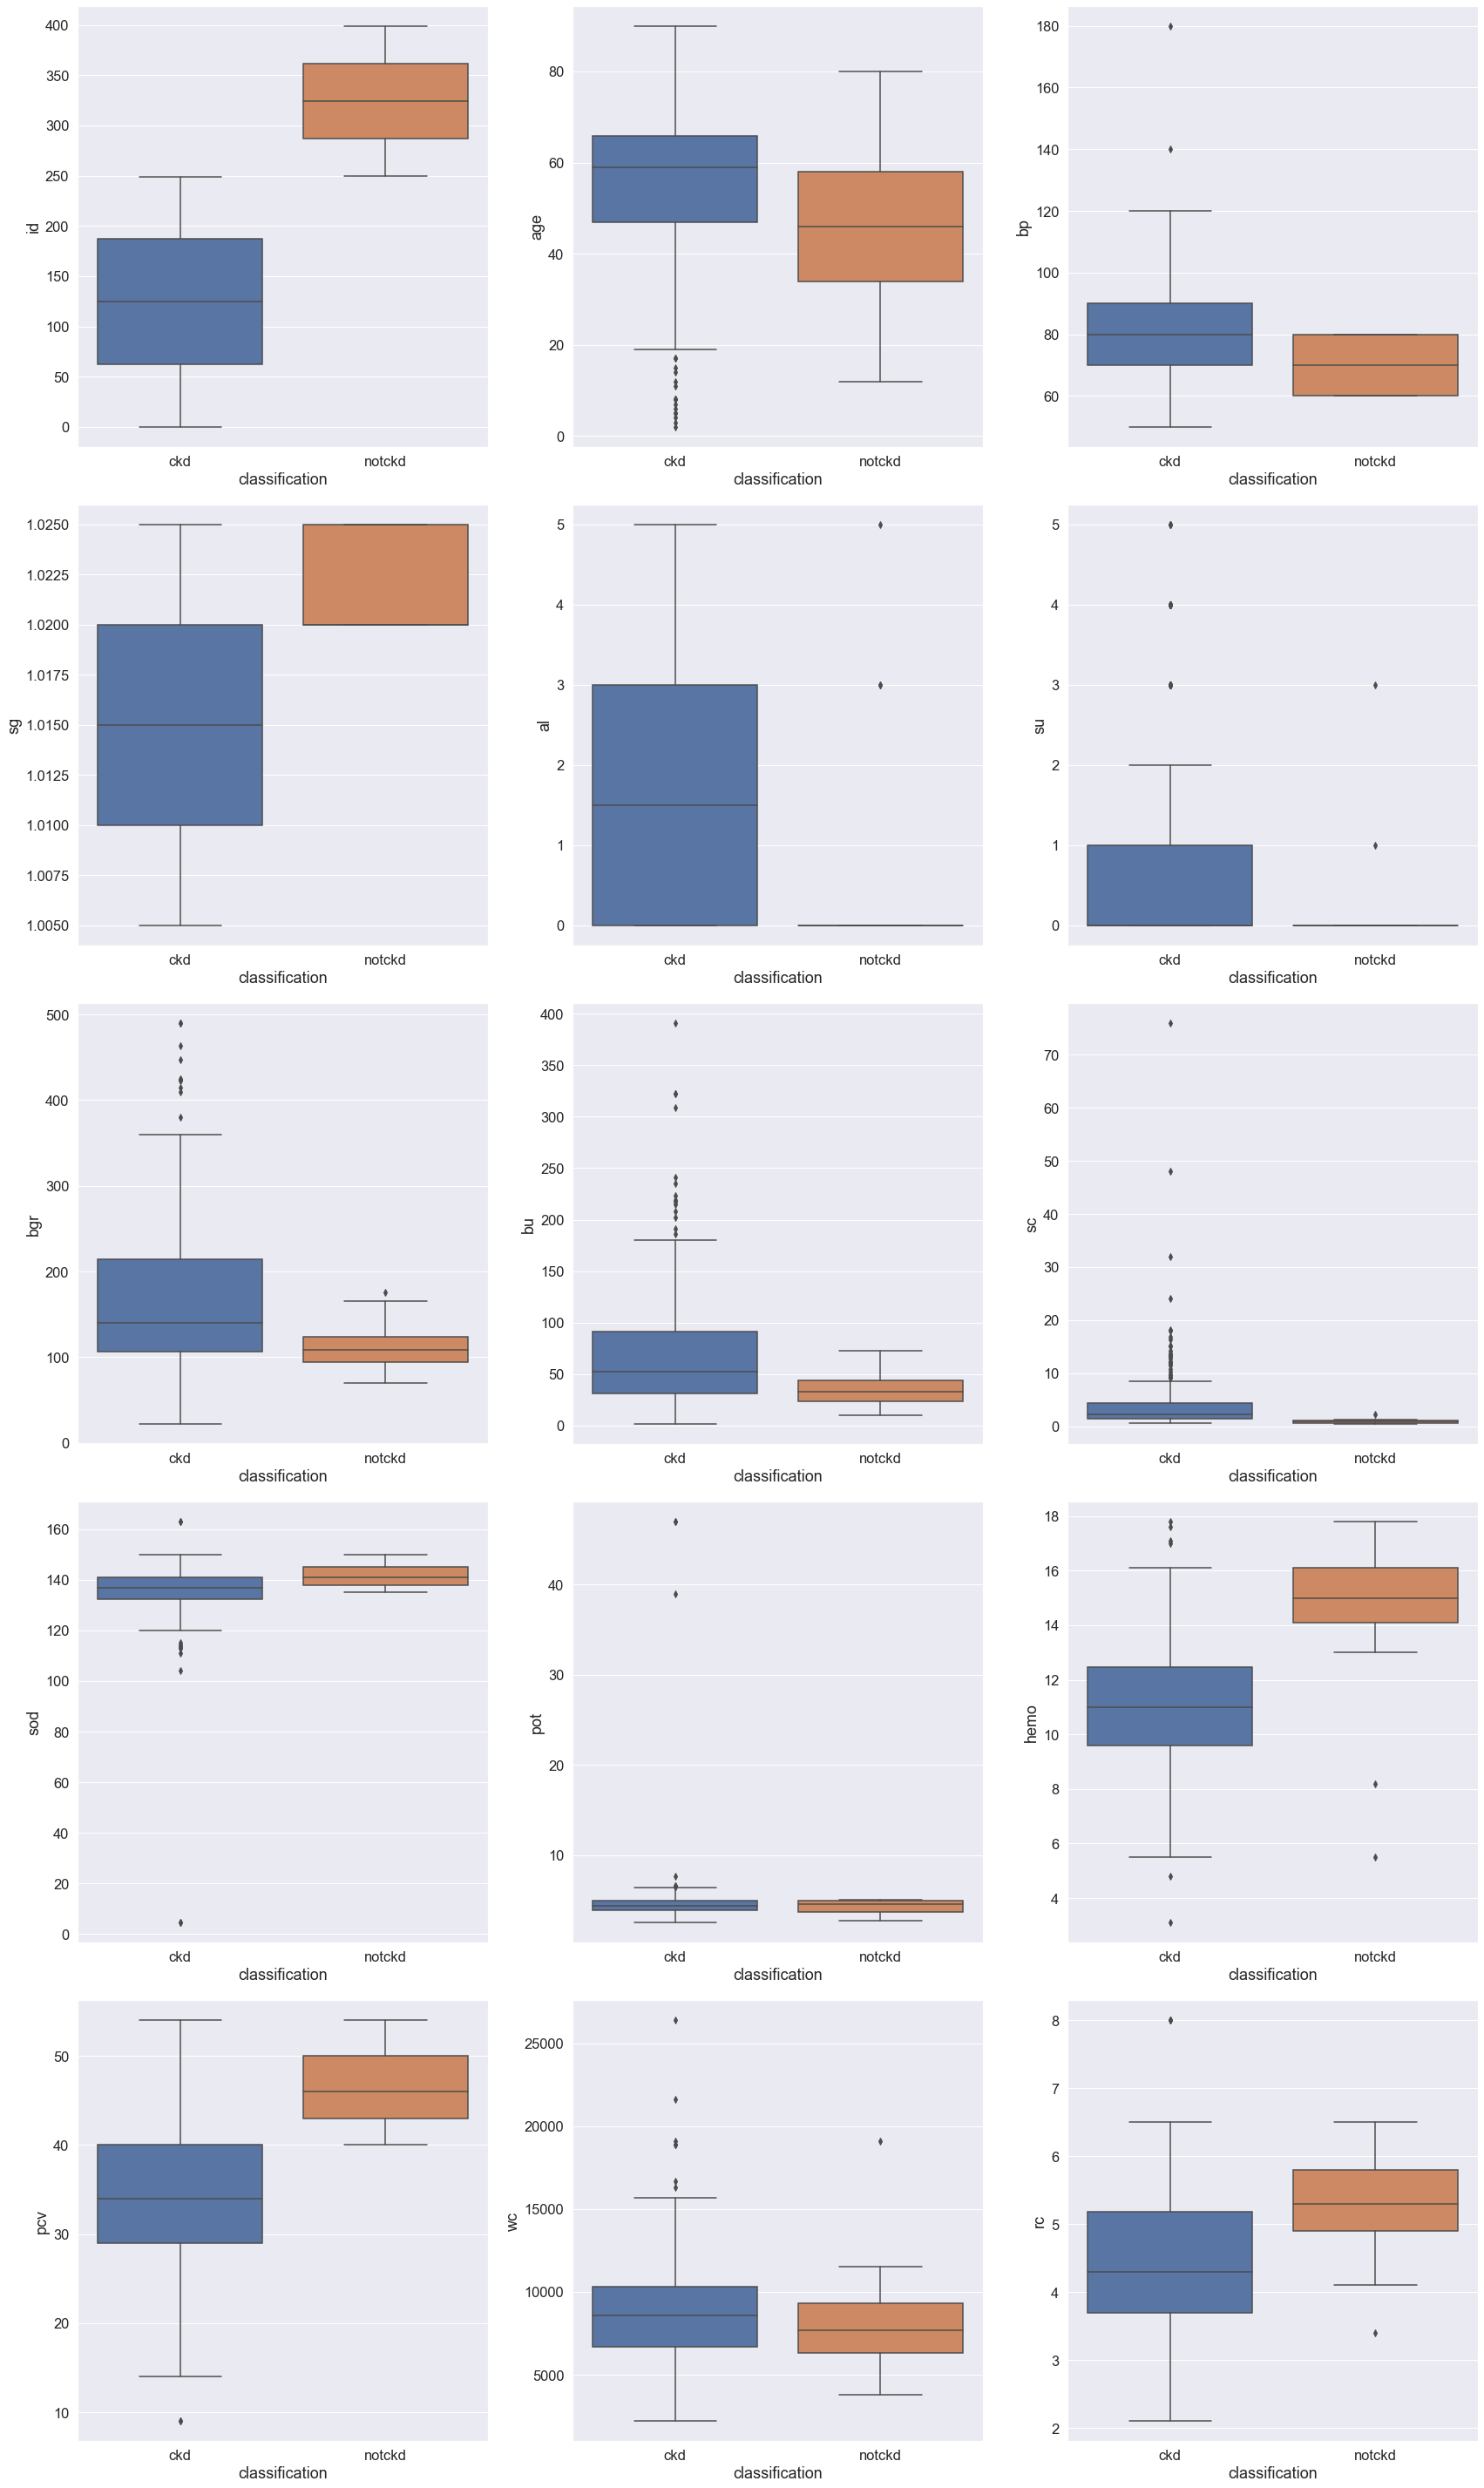

In [28]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(24,40))
i=1
for column in df[num_cols]:
    plt.subplot(5,3,i)
    sns.boxplot(x=df.classification, y=df.loc[:,column])
    i = i + 1
    
plt.tight_layout()
plt.show()

### Inferences:-
We observe some patients having high sugar levels above normal range.
Patients having bgr > 200 are suffering from diabetes according to ADA guidelines.
Patients have higher nitrogren levels contained in urea in body.
If the Serum Certainine level is very high the person suffers from chronic kidney disease and has very less chance to survive.
The normal level to have sodium in body is 135-145 mEq/L,but for kidney failure, patients usually have low sodium. Level almost 0 is again an outlier.
Potassium levels in the body which are greater than 7, patients have chances of severe hyperkalemia. However, levels greater than 30 is really an outlier.
Hemoglobin in a person less than 5 is clearly is outlier and person has very less chance to survive. 

### Univariate Analysis 

In [29]:
df.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

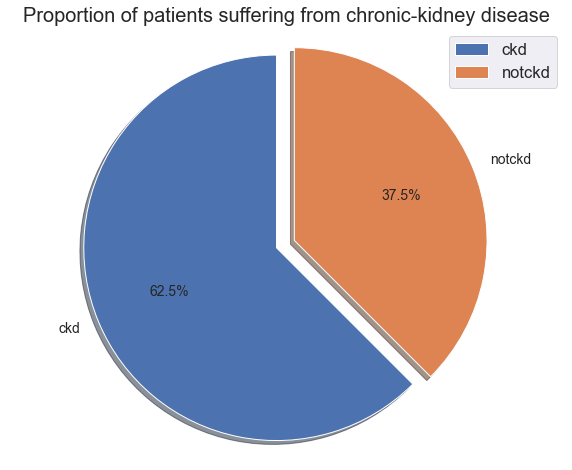

In [31]:
labels = 'ckd','notckd'
sizes = [df.classification[df['classification']=='ckd'].count(), df.classification[df['classification']=='notckd']
         .count()]
explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       textprops={'fontsize':14})
ax.axis('equal')
plt.legend(loc='upper right')
plt.title("Proportion of patients suffering from chronic-kidney disease",size=20)
plt.show()

### 62% patients are suffering from chronic kidney disease. 

### Visualize the dataset using any two appropriate graphs

### Categorical Variables

Categorical Features


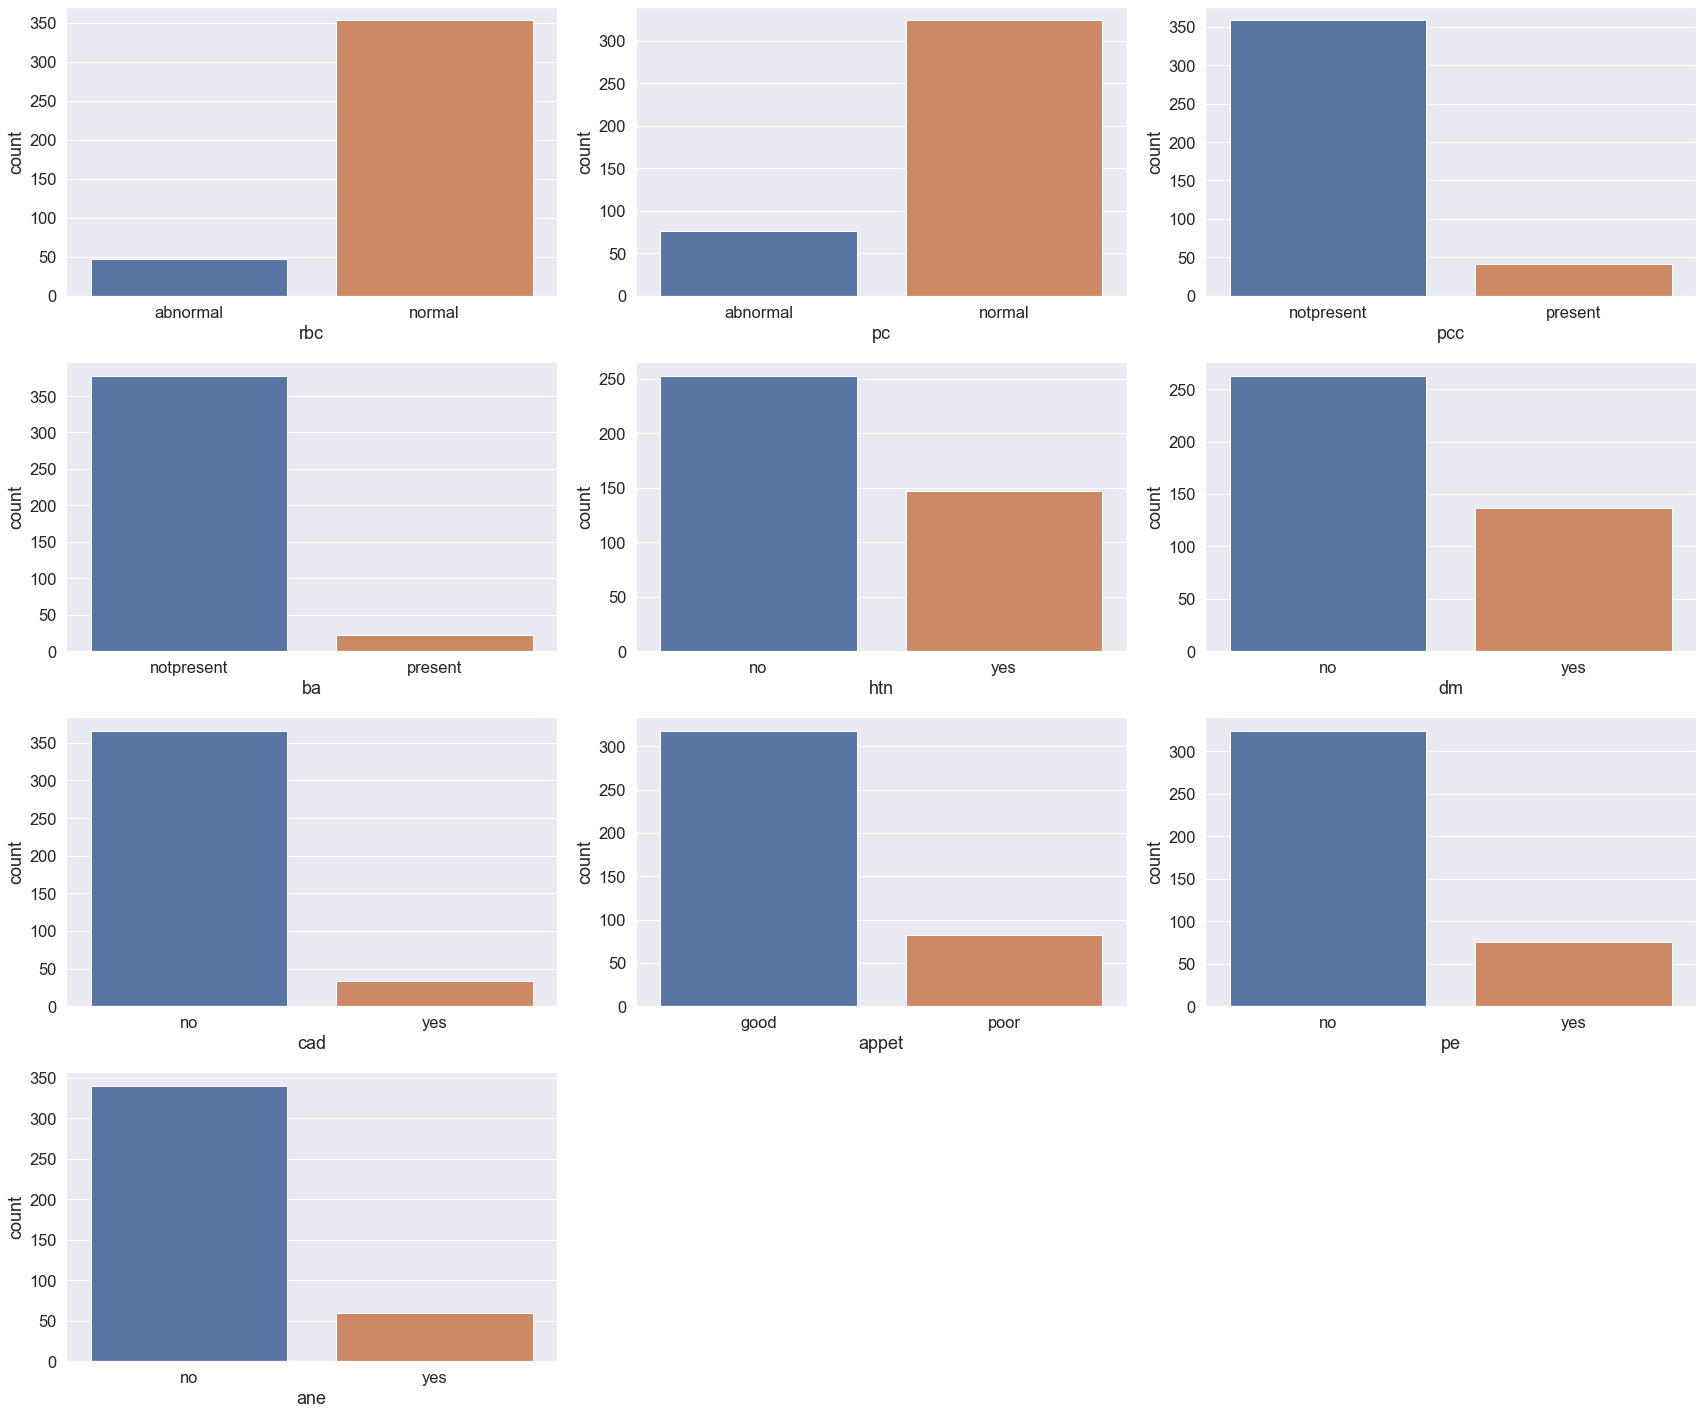

In [32]:
print("Categorical Features")
sns.set(rc={'figure.figsize':(24,20)}, font_scale=1.5)

i = 1
for column in df.select_dtypes("category"):
    if column != "classification":
        plt.subplot(4,3,i)
        sns.countplot(df[column])
        i = i + 1
                   
plt.tight_layout()
plt.show()

### The univariate analysis of various categorical variables shows the distribution of labels in the respective columns. However, for some columns such as "wc" the label size is very huge. Hence, you can observe lot of values overlapping over each other.

### Numerical Variables

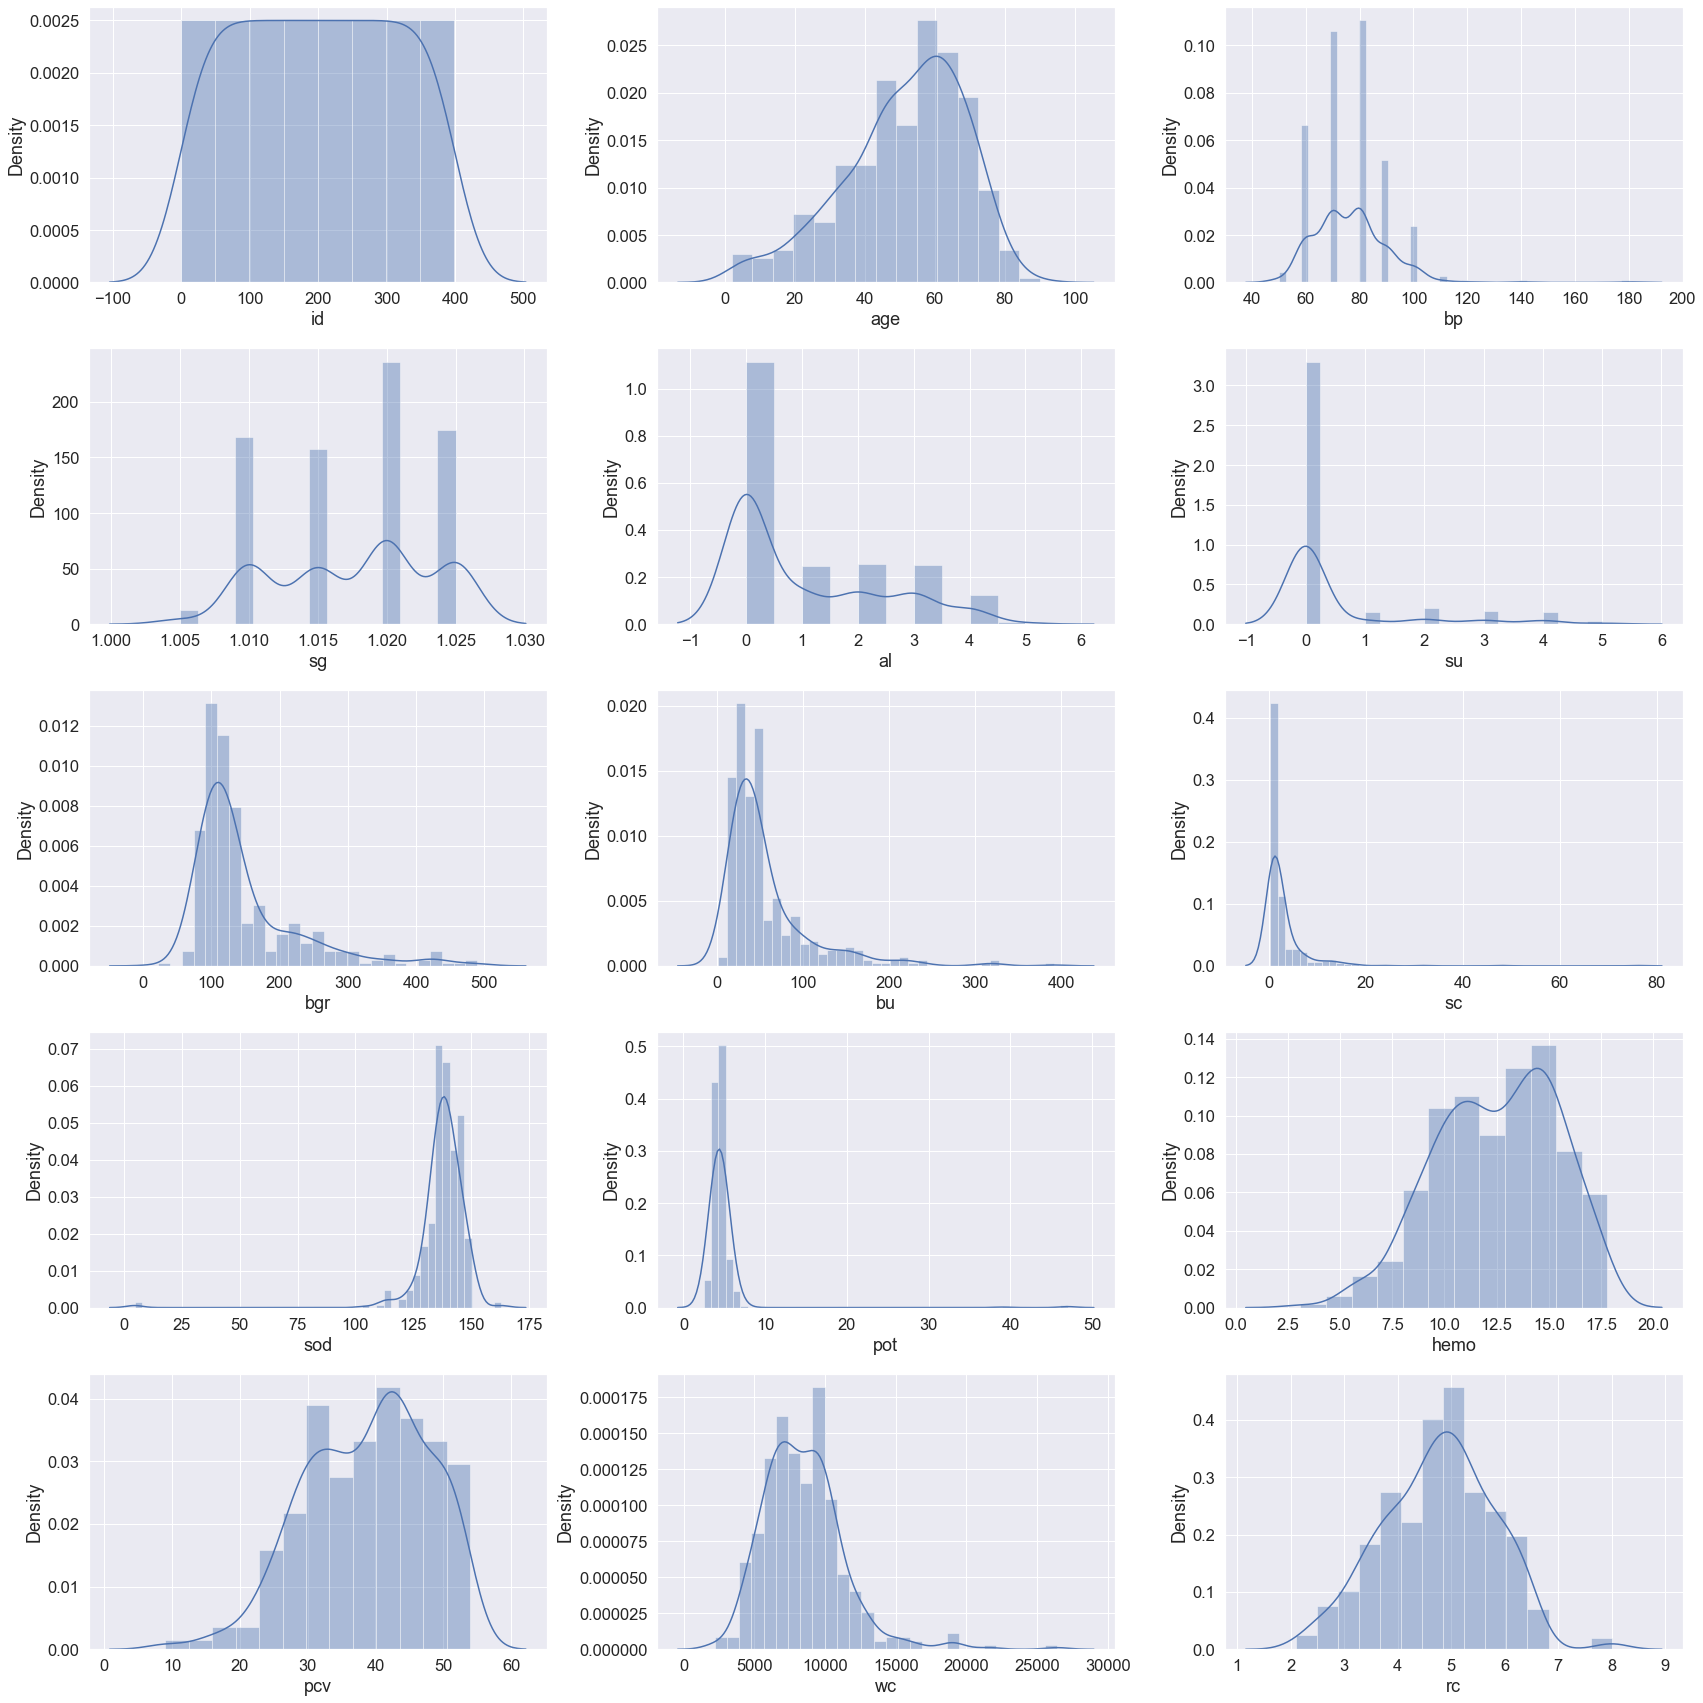

In [33]:
sns.set(rc={'figure.figsize':(24,24)}, font_scale=1.5)
i = 1
for column in df.select_dtypes(["int64","float64"]):
    plt.subplot(5,3,i)
    sns.distplot(df[column])
    i = i + 1
          
plt.tight_layout()
plt.show()

We don't observe a perfectly normal distribution among the features except "id", which is no much required in our further analysis. Most of the features are either right or left skewed. Features such as "age" and "hemo" almost nearing to a normal distribution.

In [34]:
df = df.drop(["id"], axis=1)

df.shape

(400, 25)

### Bi-variate analysis  - Visualize the correlation between all the variables of the dataset.

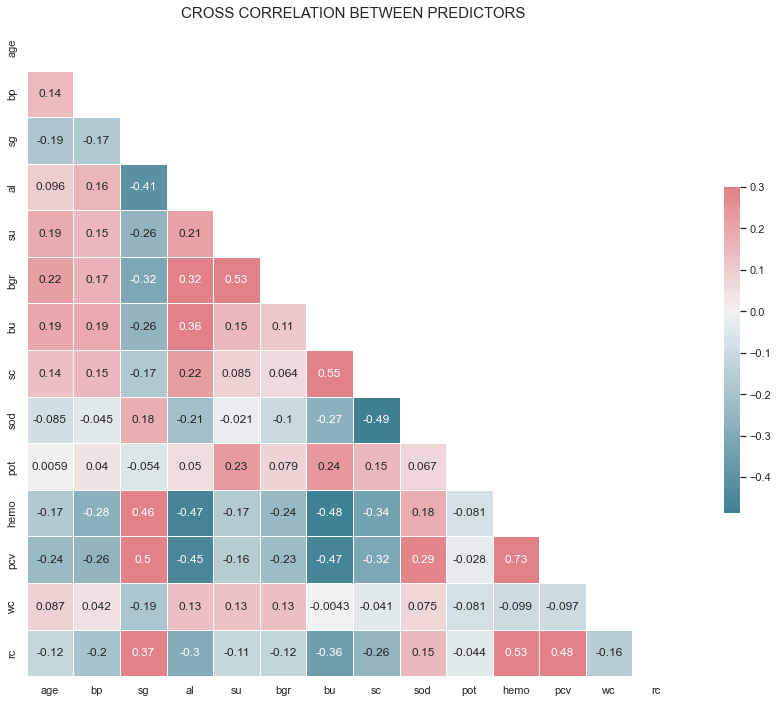

In [35]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.iloc[:, :-1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True);
plt.title("CROSS CORRELATION BETWEEN PREDICTORS", fontsize=15)
plt.show()

The features which are highly correlated are "hemoglobin","sugar","serum creatinine","nitrogen in blood" and "blood glucose test".

### Continuous features comparison w.r.t Target

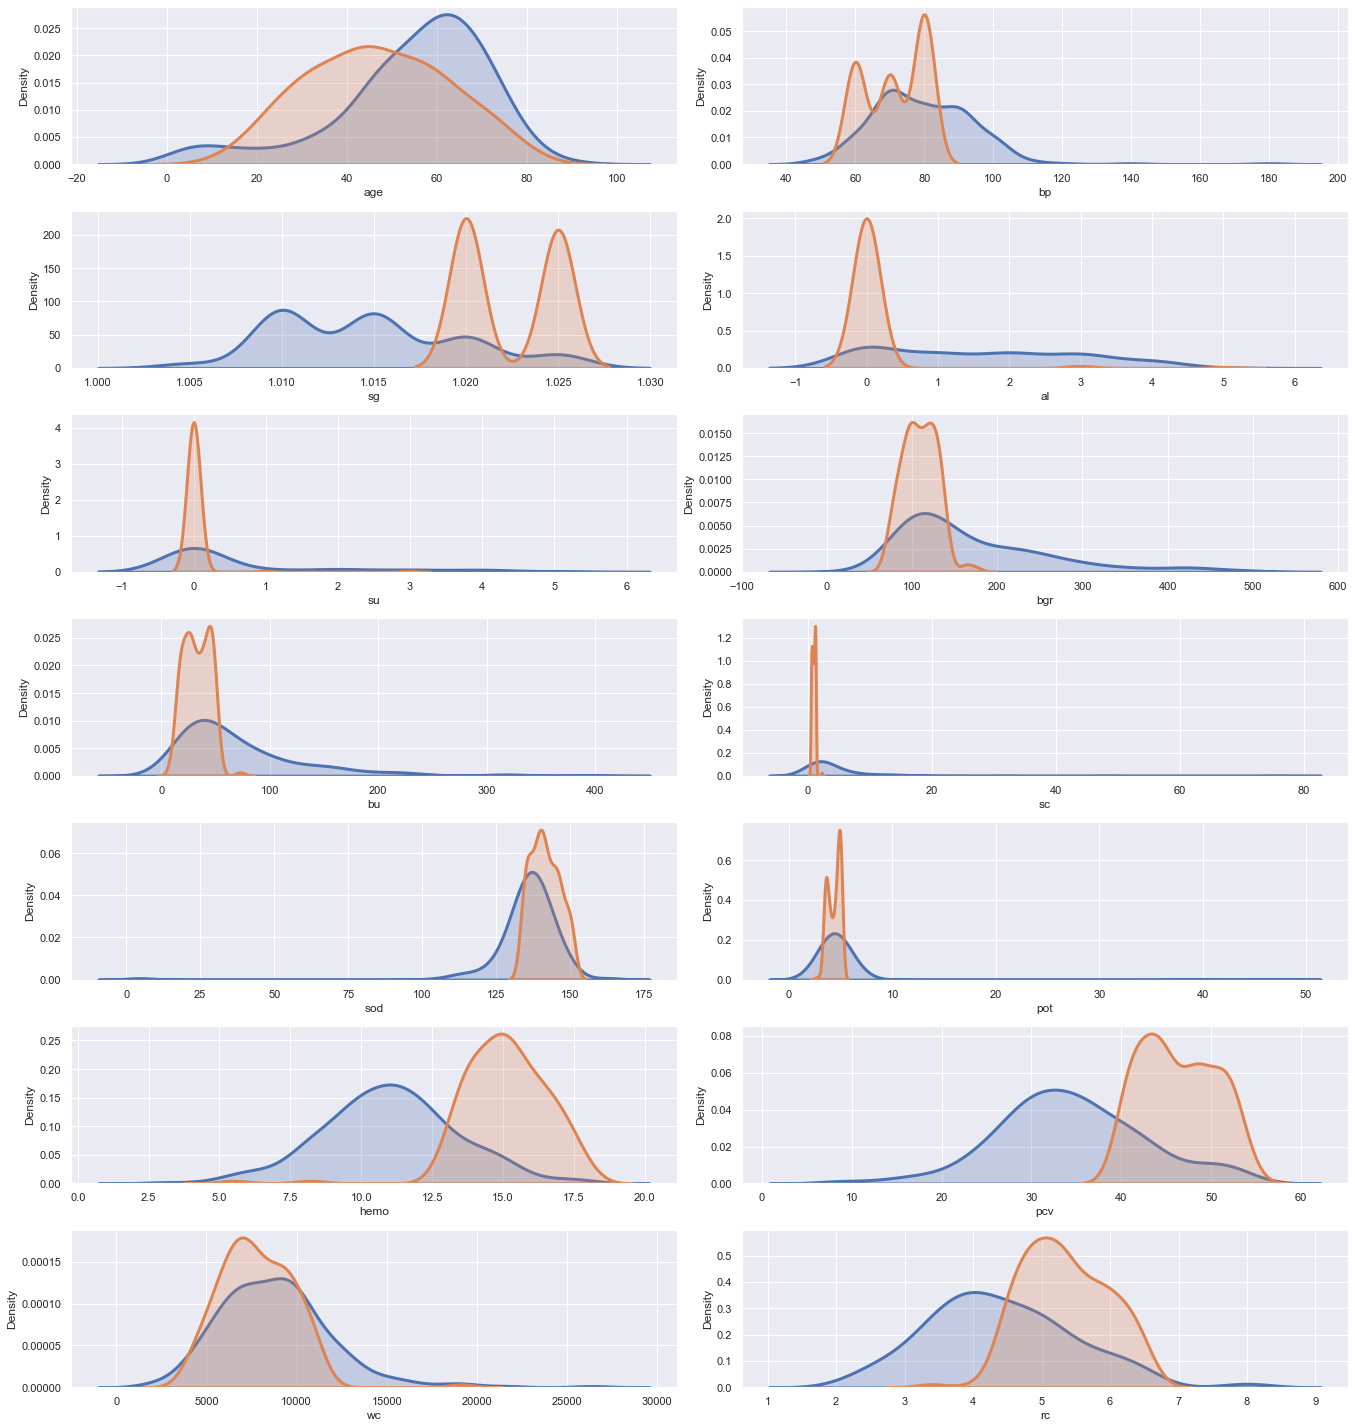

In [37]:
sns.set()
fig = plt.figure(figsize=(19,20))
i=1
for column in df.select_dtypes(["int64","float64"]):
    plt.subplot(7,2,i)
    sns.distplot(df.loc[df.classification=='ckd',column],hist=False,kde=True,
                kde_kws={'shade': True, 'linewidth':3}, label='ckd')
    sns.distplot(df.loc[df.classification=='notckd',column],hist=False,kde=True,
                kde_kws={'shade': True, 'linewidth':3},label='notckd')
    i=i+1
plt.tight_layout()
plt.show()

#### Inferences from distribution of continuous features

1.While looking at columns sg, hemo, bu and bgr we see lot of patients of non-chronic kidney disease lying in the high value range.

2.Patients suffering from chronic ailment don't fall in the normal category in column "age".

3.In rest other columns, we see lot of bimodal/trimodal distribution present such as "sg","bp" and "pot".

### Comparison of Categorical Features w.r.t Target

In [38]:
def bivariate_cat(data,col1,col2,rot):
    if col2=='classification':
        cross_tab = pd.crosstab(data[col1], data[col2]).apply(lambda x: x/x.sum() * 100, axis=1).round(2)
        cross_tab.plot.bar(figsize=(6,5))
        plt.xlabel('{}'.format(col1))
        plt.ylabel('% of patients who are suffering from chronic-disease'.format(col1))
        plt.title('{} Vs chronic-disease-suffering'.format(col1))
        plt.xticks(rotation=rot)
        plt.show()
        return cross_tab

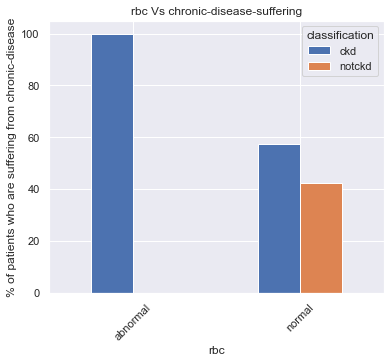

classification,ckd,notckd
rbc,,
abnormal,100.00,0.00
normal,57.51,42.49


In [39]:
bivariate_cat(df,'rbc','classification',45)

### The graph shows patients having rbc as normal, have high chances of suffering from chronic kidney disease.

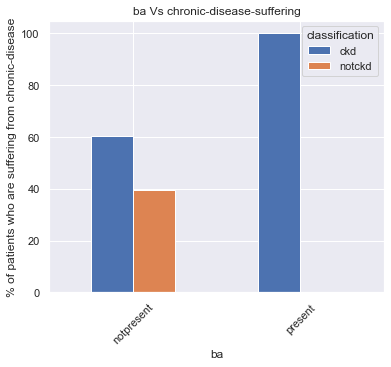

classification,ckd,notckd
ba,,
notpresent,60.32,39.68
present,100.00,0.00


In [40]:
bivariate_cat(df,"ba","classification",45)

### Patients who have some amount of bacteria in their body , have higher chances of suffering from chronic disease.

### Encoding Categorical Features

In [42]:
from sklearn.preprocessing import LabelEncoder

# target column
tgt_col = ['classification']

# Categorical cols
category_names = df.nunique()[df.nunique() < 20].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

# Numerical cols
num_cols = [i for i in df.columns if i not in category_names + tgt_col]

# Binary cols
bin_cols = df.nunique()[df.nunique()==2].keys().tolist()

# Multi-cols
multi_cols = [i for i in category_names if i not in bin_cols]

# Label Encoding Binary cols
le = LabelEncoder()
for i in bin_cols:
    df[i] = le.fit_transform(df[i])
    
# Duplicating cols for multi-value columns
df = pd.get_dummies(data=df, columns=multi_cols)

In [43]:
df.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,...,sg_1.015,sg_1.02,sg_1.025,al_0.0,al_1.0,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
0,48.0,1,1,0,0,121.0,36.0,1.2,135.0,5.0,15.4,44.0,7800.0,5.2,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,7.0,1,1,0,0,100.0,18.0,0.8,145.0,4.9,11.3,38.0,6000.0,3.4,0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,62.0,1,1,0,0,423.0,53.0,1.8,131.0,4.4,9.6,31.0,7500.0,6.5,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,48.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,51.0,1,1,0,0,106.0,26.0,1.4,136.0,5.5,11.6,35.0,7300.0,4.6,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


### Normalizing features - Do feature scaling 

In [45]:
cont_features = []
for features in df.select_dtypes(include=['int64','float64']):
    cont_features.append(features)

In [46]:
kd_df = df
print("Scaling numerical features")
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
kd_df[cont_features] = minmax.fit_transform(kd_df[cont_features].values)

Scaling numerical features


In [47]:
kd_df.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,...,sg_1.015,sg_1.02,sg_1.025,al_0.0,al_1.0,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
0,0.522727,1,1,0,0,0.211538,0.088575,0.010582,0.823344,0.056180,0.836735,0.777778,0.231405,0.525424,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.056818,1,1,0,0,0.166667,0.042362,0.005291,0.886435,0.053933,0.557823,0.644444,0.157025,0.220339,0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0.681818,1,1,0,0,0.856838,0.132221,0.018519,0.798107,0.042697,0.442177,0.488889,0.219008,0.745763,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.522727,1,0,1,0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0.556818,1,1,0,0,0.179487,0.062901,0.013228,0.829653,0.067416,0.578231,0.577778,0.210744,0.423729,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


##                                                Model Building

### Extract X as all columns except the last column and Y as the last column

In [48]:
cols = [i for i in kd_df.columns if i not in tgt_col]
X = kd_df[cols]
Y = pd.DataFrame(kd_df['classification'])

X.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,...,sg_1.015,sg_1.02,sg_1.025,al_0.0,al_1.0,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
0,0.522727,1,1,0,0,0.211538,0.088575,0.010582,0.823344,0.056180,0.836735,0.777778,0.231405,0.525424,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.056818,1,1,0,0,0.166667,0.042362,0.005291,0.886435,0.053933,0.557823,0.644444,0.157025,0.220339,0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0.681818,1,1,0,0,0.856838,0.132221,0.018519,0.798107,0.042697,0.442177,0.488889,0.219008,0.745763,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.522727,1,0,1,0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0.556818,1,1,0,0,0.179487,0.062901,0.013228,0.829653,0.067416,0.578231,0.577778,0.210744,0.423729,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


### Using K-Fold Cross validation

### Perform 5-fold cross-validation 

In [49]:
from sklearn.model_selection import KFold

# Create K-Folds
folds = KFold(n_splits=5, shuffle=True, random_state=0)

for train_index, test_index in folds.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

SVM Algorithm

SVM kernels(linear,gaussian, polynomial) are used. Tuning the various parameters such as C, gamma and degree to find out the best performing model.

### Train an SVM model for the dataset

### Running SVM with default parameter

In [50]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc = SVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score : ")
print(accuracy_score(Y_test, y_pred))

Accuracy Score : 
0.975


## Get the classification report and confusion matrix.

### Confusion Matrix

In [51]:
confusion_matrix(Y_test, y_pred)

array([[44,  2],
       [ 0, 34]], dtype=int64)

### Classification Report

In [52]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.94      1.00      0.97        34

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



### Linear Kernel

In [53]:
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score :")
print(accuracy_score(Y_test, y_pred))

Accuracy Score :
0.9625


### Confusion Matrix

In [54]:
confusion_matrix(Y_test, y_pred)

array([[43,  3],
       [ 0, 34]], dtype=int64)

### Classification Report

In [55]:
# Classification Report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.92      1.00      0.96        34

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



### RBF Kernel

In [56]:
svc = SVC(kernel='rbf')
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score")
print(accuracy_score(Y_test, y_pred))

Accuracy Score
0.975


### Confusion Matrix

In [57]:
# Confusion Matrix

confusion_matrix(Y_test, y_pred)

array([[44,  2],
       [ 0, 34]], dtype=int64)

### Classification Report

In [58]:
# Classification Report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.94      1.00      0.97        34

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



### Hyper-parameter Tuning


Determining hyper-parameter "C"

The "C" parameter tells the SVM optimization how much we want to avoid misclassifying the training data. For larger values of C, the optimization will choose a smaller-margin hyperplane if the hyperplane does a better job of getting all training points classified correctly. Also, a small value of C will cause the optimizer to look at a larger-margin seperating hyperplane, even if that hyperplane misclassifies more points.

Large values of C causes "overfitting" of model and small values of "C" causes "underfitting" of model. Thus, the value of C needs to be generalized.

In [59]:
from sklearn.model_selection import cross_val_score

C_range = list(np.arange(0.1,2,0.1))
acc_score = []
for c in C_range:
    svc = SVC(kernel='linear',C=c)
    scores = cross_val_score(svc, X, Y,scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.975, 0.9724999999999999, 0.9724999999999999, 0.9775, 0.9775, 0.9775, 0.9799999999999999, 0.9799999999999999, 0.9799999999999999, 0.9799999999999999, 0.9799999999999999, 0.9799999999999999, 0.9799999999999999, 0.9775, 0.9775, 0.9775, 0.9775, 0.9775, 0.9775]


### Plotting graph 

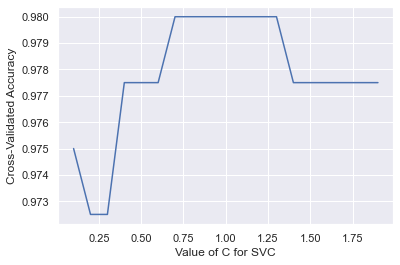

In [60]:

import matplotlib.pyplot as plt
%matplotlib inline

C_range = list(np.arange(0.1,2,0.1))
# plot the value of C for SVM
plt.plot(C_range, acc_score)
#plt.xticks(np.arange(0.0001,0.1,0.1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Considering 'rbf' as kernel and taking different values of "gamma"



Gamma parameter is the inverse of standard deviation of the RBF Kernel, which is used as similarity measure between two points. A small gamma value define a Gaussian function with a large variance. Here, two points can be considered similar even if they are far from each other. On the other hand, a large gamma value defines a Gaussian function with a small variance.

In [61]:
gamma_range = [0.0001, 0.001, 0.01, 0.1]
acc_score =[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.625, 0.625, 0.9575000000000001, 0.9774999999999998]


### Plot the gamma for SVM (x-axis) versus the cross-validated accuracy(y-axis)

Text(0, 0.5, 'Cross validated accuracy')

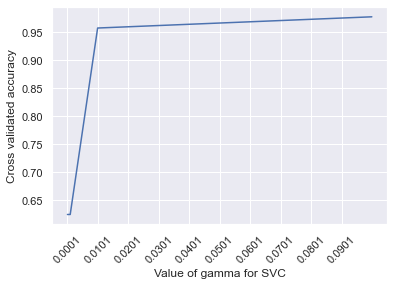

In [62]:

plt.plot(gamma_range, acc_score)
plt.xlabel('Value of gamma for SVC')
plt.xticks(np.arange(0.0001, 0.1, 0.01), rotation=45)
plt.ylabel('Cross validated accuracy')

### The score increases steadily and reaches its peak at 0.01 and then, decreases till gamma=1. Thus, Gamma should be around 0.01.